## 머신러닝 분류 - 로지스틱 회귀 (타이타닉)

 - Business Understanding: 생존자 예측 (Task: Classification)

- Data Understanding: 수집, 통계, 시각화

In [146]:
import pandas as pd
train_data = pd.read_csv('../python/11_pandas/data/train.csv')
train_data.shape

(891, 12)

In [147]:
train_data.info() # Null 값 확인 (Age컬럼, Cabin컬럼)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [148]:
train_data.describe() # 이상치 확인

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [149]:
train_data.corr()

C:\Users\Playdata\AppData\Local\Temp\ipykernel_6780\1402113604.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [150]:
# 성별 컬럼과 Survived 컬럼의 상관관계
# 남 == 0, 여 == 1
train_data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [151]:
train_data['Sex'].map({'male': 0, 'female': 1}).corr(train_data['Survived'])

0.5433513806577551

In [152]:
train_data['Sex_num'] = train_data['Sex'].map({'male': 0, 'female': 1})
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_num
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [153]:
train_data.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_num
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.042939
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.543351
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.131900
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.093254
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.114631
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.245489
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.182333
Sex_num,-0.042939,0.543351,-0.131900,-0.093254,0.114631,0.245489,0.182333,1.000000


<Axes: >

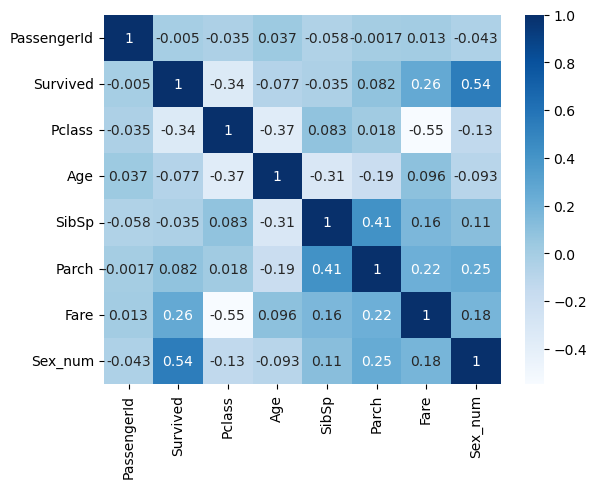

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(train_data.corr(numeric_only=True), cmap='Blues', annot=True)

- Data Preparation

In [155]:
# Age 결측치 처리
train_data.info() # Null 값 확인 (Age컬럼, Cabin컬럼)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Sex_num      891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [156]:
# train_data의 나이의 결측치에 나이의 평균 값 대입
# 평균 값 저장
train_data_age_mean  = train_data['Age'].mean()
train_data_age_mean

29.69911764705882

In [157]:
train_data['Age'].fillna(train_data_age_mean, inplace=True)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Sex_num      891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


### 모델링

In [158]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression

Modeling1 (로지스틱 회귀)
- 사용할 특징: ['Age', 'Fare', 'Parch', 'Pclass', 'Sex_num', 'SibSp']

In [159]:
# 위 특징만 사용하는 X_train 데이터 추출, y_train 데이터는 'Survived' 컬럼만 추출
# X_train.shape, y_train.shape 출력시 아래와 같은 형태
X_train = train_data[['Age', 'Fare', 'Parch', 'Pclass', 'Sex_num', 'SibSp']]
y_train = train_data['Survived']
X_train.shape, y_train.shape

((891, 6), (891,))

In [160]:
log_reg = LogisticRegression()
# 학습 데이터로 모델 학습시키기(fit)
log_reg.fit(X_train, y_train)

LogisticRegression()

In [161]:
# y_pred에 X_train 데이터에 대한 log_reg 모델의 예측 결과 저장
y_pred = log_reg.predict(X_train)
# 아래와 같이 confusion matrix 확인 (y_train과 y_pred 비교)
confusion_matrix(y_train, y_pred)

array([[469,  80],
       [100, 242]], dtype=int64)

In [162]:
# y_train과 y_pred 간 정확도 
accuracy_score(y_train, y_pred)

0.797979797979798

Modeling2
- ['Age', 'Sex_num', 'Pclass'] 특징만 사용 

In [163]:
X_train.head()
X_train = X_train[['Age', 'Sex_num', 'Pclass']]
X_train.shape

(891, 3)

In [164]:
log_reg2 = LogisticRegression()
# ['Age', 'Sex_num', 'Pclass'] 특징만 사용하는 X_train 데이터 추출, y_train 데이터는 'Survived' 컬럼만 추출
# 학습 데이터로 log_reg2 모델 학습시키기(fit)
log_reg2.fit(X_train, y_train)

# y_pred에 X_train 데이터에 대한 log_reg2 모델의 예측 결과 저장
y_pred = log_reg2.predict(X_train)

# 아래와 같이 confusion matrix 확인 (y_train과 y_pred 비교)
confusion_matrix(y_train, y_pred)

array([[470,  79],
       [ 99, 243]], dtype=int64)

In [165]:
# y_train과 y_pred 간 정확도 
accuracy_score(y_train, y_pred)

0.8002244668911336

- Evaluate

> Test set 에 대한 평가 (Train Set에 대한 평가보다 더 신뢰성이 높은 평가)

In [166]:
test_data = pd.read_csv('../python/11_pandas/data/test.csv')
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [167]:
train_data_age_mean

29.69911764705882

In [168]:
test_data['Age'].mean()

30.272590361445783

In [169]:
# train set에 있는 평균 나이로 fill
test_data['Age'].fillna(train_data_age_mean, inplace=True)
test_data['Fare'].fillna(train_data['Fare'].mean(), inplace=True)

test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [170]:
test_data['Sex_num'] = test_data['Sex'].map({'male': 0, 'female': 1})

In [171]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_num
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [172]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_num
0,892,3,"Kelly, Mr. James",male,34.500000,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.000000,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,29.699118,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,29.699118,0,0,359309,8.0500,NaN,S,0


In [173]:
# X_test라는 변수에 test_data에서 ['Age', 'Fare', 'Parch', 'Pclass', 'Sex_num', 'SibSp'] 컬럼만 선택한 DataFrame 저장 
X_test = test_data[['Age', 'Fare', 'Parch', 'Pclass', 'Sex_num', 'SibSp']]
X_test.shape

(418, 6)

In [174]:
X_test.columns

Index(['Age', 'Fare', 'Parch', 'Pclass', 'Sex_num', 'SibSp'], dtype='object')

In [175]:
# 첫번째 모델(log_reg)을 사용하여 X_test에 대한 예측 결과 log_reg_model1.csv 파일에 저장
# -> Kaggle에 제출 (정확도 0.75598)
model1 = log_reg.predict(X_test)
log_reg_model1 = pd.DataFrame()
log_reg_model1['PassengerId'] = test_data['PassengerId']
log_reg_model1['Survived'] = model1
log_reg_model1.to_csv('data/log_reg_model1.csv', index=False)

In [176]:
type(model1)

numpy.ndarray

In [177]:
sample = pd.concat([test_data['PassengerId'],pd.Series(model1)], axis=1)
sample.columns = ['PassengerId', 'Survived']
sample.head(2)

,PassengerId,Survived
0,892,0
1,893,0


In [178]:
# 두번째 모델 (['Age', 'Sex_num', 'Pclass']) 컬럼만 입력 변수에 사용
# 두번째 모델(log_reg2)을 사용하여 X_test에 대한 예측 결과 log_reg_model2.csv 파일에 저장
# -> Kaggle에 제출 (정확도 0.758373)
X_test = test_data[['Age', 'Sex_num', 'Pclass']]
model2 = log_reg2.predict(X_test)
log_reg_model2 = pd.DataFrame()
log_reg_model2['PassengerId'] = test_data['PassengerId']
log_reg_model2['Survived'] = model2
log_reg_model2.to_csv('data/log_reg_model2.csv', index=False)

- 로지스틱 Regression 식 확인

In [179]:
# w_0
log_reg2.intercept_

array([2.07338598])

In [180]:
# ['Age', 'Sex_num', 'Pclass']
# w_1, w_2, w_3
log_reg2.coef_

array([[-0.03284127,  2.51919174, -1.13811533]])

In [181]:
features_selected = ['Age', 'Sex_num', 'Pclass']
X_test[features_selected].loc[:4,:] * log_reg2.coef_

,Age,Sex_num,Pclass
0,-1.133024,0.000000,-3.414346
1,-1.543540,2.519192,-3.414346
2,-2.036159,0.000000,-2.276231
3,-0.886714,0.000000,-3.414346
4,-0.722508,2.519192,-3.414346


In [182]:
# 아래 값이 z의 의미임
(X_test[features_selected].loc[:4,:] * log_reg2.coef_).sum(axis=1) + log_reg2.intercept_

0   -2.473984
1   -0.365308
2   -2.239003
3   -2.227674
4    0.455724
dtype: float64

In [183]:
import numpy as np

# z
logr_odds = np.sum(X_test[features_selected].loc[:4,:] * log_reg2.coef_, axis=1) + log_reg2.intercept_
odds = np.exp(logr_odds)
probability = odds / (1 + odds)
probability

0    0.077702
1    0.409675
2    0.096302
3    0.097293
4    0.611999
dtype: float64

In [184]:
# predict_proba 함수: 분류 하기 전 클래스 별 확률을 확인
y_pred_proba = log_reg2.predict_proba(X_test[features_selected])
y_pred_proba.shape

(418, 2)

In [185]:
y_pred_proba[:5,:] # [생존하지 않을 확률, 생존할 확률]

array([[0.92229774, 0.07770226],
       [0.5903247 , 0.4096753 ],
       [0.90369775, 0.09630225],
       [0.90270728, 0.09729272],
       [0.38800073, 0.61199927]])

### KNN (k개의 이웃을 기반으로 판단) 머신러닝 알고리즘

In [186]:
X_train = train_data[['Age','Fare','Parch','Pclass','Sex_num','SibSp']]
X_train.head()

,Age,Fare,Parch,Pclass,Sex_num,SibSp
0,22.0,7.2500,0,3,0,1
1,38.0,71.2833,0,1,1,1
2,26.0,7.9250,0,3,1,0
3,35.0,53.1000,0,1,1,1
4,35.0,8.0500,0,3,0,0


In [187]:
X_train_sample = X_train.loc[300:309, ['Fare']]
X_train_sample.shape

(10, 1)

In [188]:
y_train_sample = y_train[300:310]
y_train_sample.shape

(10,)

In [189]:
X_train_sample

,Fare
300,7.7500
301,23.2500
302,0.0000
303,12.3500
304,8.0500
305,151.5500
306,110.8833
307,108.9000
308,24.0000
309,56.9292


In [190]:
y_train_sample

300    1
301    1
302    0
303    1
304    0
305    1
306    1
307    1
308    0
309    1
Name: Survived, dtype: int64

In [191]:
from sklearn.neighbors import KNeighborsClassifier

knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_5 = KNeighborsClassifier(n_neighbors=5)

In [192]:
knn_1.fit(X_train_sample.values, y_train_sample)
knn_3.fit(X_train_sample.values, y_train_sample)
knn_5.fit(X_train_sample.values, y_train_sample)

KNeighborsClassifier()

In [193]:
knn_1.predict([[2]]), knn_3.predict([[2]]), knn_5.predict([[2]])

(array([0], dtype=int64), array([0], dtype=int64), array([1], dtype=int64))

In [194]:
knn_1.predict([[25]]), knn_3.predict([[25]]), knn_5.predict([[25]])

(array([0], dtype=int64), array([1], dtype=int64), array([1], dtype=int64))

In [195]:
knn_1.predict_proba([[25]]), knn_3.predict_proba([[25]]), knn_5.predict_proba([[25]])

(array([[1., 0.]]), array([[0.33333333, 0.66666667]]), array([[0.4, 0.6]]))

In [196]:
colors = y_train_sample.apply(lambda x: ['red','blue'][x])
colors

300    blue
301    blue
302     red
303    blue
304     red
305    blue
306    blue
307    blue
308     red
309    blue
Name: Survived, dtype: object

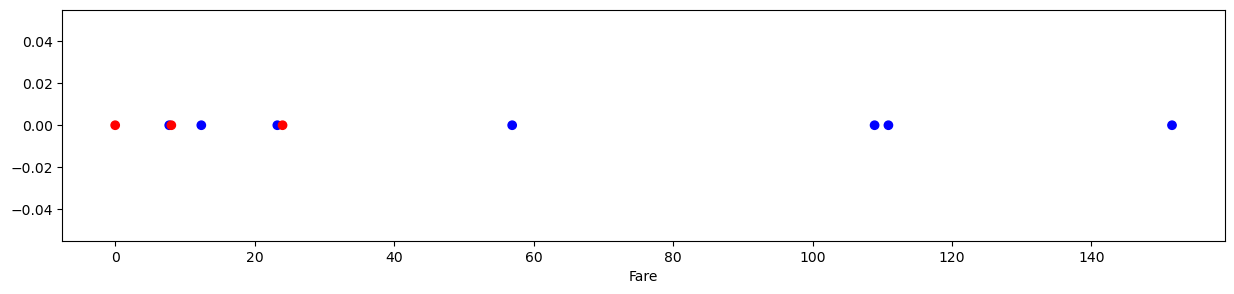

In [197]:
# 시각화
plt.figure(figsize=[15,3])
plt.scatter(X_train_sample, [0] * len(X_train_sample), c=colors) # red: 0, blue:1 
plt.xlabel('Fare')
plt.show()

-  knn_3으로 타이타닉 생존자예측 모델 만들기 (X_train 사용)
(특징: ['Age', 'Fare', 'Parch', 'Pclass', 'Sex_num', 'SibSp'])

In [198]:
X_train.columns

Index(['Age', 'Fare', 'Parch', 'Pclass', 'Sex_num', 'SibSp'], dtype='object')

In [202]:
# X_train에 y_pred 
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3.fit(X_train.values, y_train)
y_pred = knn_3.predict(X_train)
confusion_matrix(y_train, y_pred)

# array([[492,  57],
#        [ 85, 257]])

c:\Users\Playdata\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


array([[490,  59],
       [ 84, 258]], dtype=int64)

In [200]:
# Train set에 대한 
accuracy_score(y_train, y_pred)
# 0.8406285072951739

0.8395061728395061

In [206]:
X_test = test_data[['Age', 'Fare', 'Parch', 'Pclass', 'Sex_num', 'SibSp']]
X_test

,Age,Fare,Parch,Pclass,Sex_num,SibSp
0,34.500000,7.8292,0,3,0,0
1,47.000000,7.0000,0,3,1,1
2,62.000000,9.6875,0,2,0,0
3,27.000000,8.6625,0,3,0,0
4,22.000000,12.2875,1,3,1,1
...,...,...,...,...,...,...
413,29.699118,8.0500,0,3,0,0
414,39.000000,108.9000,0,1,1,0
415,38.500000,7.2500,0,3,0,0
416,29.699118,8.0500,0,3,0,0


In [207]:
model1 = knn_3.predict(X_test)
knn3_model1 = pd.DataFrame()
knn3_model1['PassengerId'] = test_data['PassengerId']
knn3_model1['Survived'] = model1
knn3_model1.to_csv('data/knn3_model1.csv', index=False)

c:\Users\Playdata\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


- KNN3: ['Age', 'Sex_num', 'Pclass']

In [209]:
X_train = train_data[['Age', 'Sex_num', 'Pclass']]
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3.fit(X_train.values, y_train)
y_pred = knn_3.predict(X_train)
confusion_matrix(y_train, y_pred), accuracy_score(y_train, y_pred)

c:\Users\Playdata\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


(array([[511,  38],
        [ 88, 254]], dtype=int64),
 0.8585858585858586)

In [210]:
X_test = test_data[['Age', 'Sex_num', 'Pclass']]
model2 = knn_3.predict(X_test)
knn3_model2 = pd.DataFrame()
knn3_model2['PassengerId'] = test_data['PassengerId']
knn3_model2['Survived'] = model2
knn3_model2.to_csv('data/knn3_model2.csv', index=False)

c:\Users\Playdata\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
